                                                                                                         KPI'S

Librerias a usar, 
- Pandas y Numpy para el manejo de numeros y dataframes.
- Matplotlib.pyplot para generar graficos. 

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<-----

De esta forma corregui la alerta que me salia.


In [13]:
from powerbiclient import Report, models

In [14]:
import warnings

# Your code that triggers the warning

# Suppress the warning
warnings.filterwarnings("ignore", category=UserWarning, module="openpyxl.styles.stylesheet")



---->

Se abre el archivo

In [52]:
df_internet = pd.read_excel('PenetraciondelInternetfijoporprovinciaaccesosporcada100hogares_2917941698851677186.xlsx')

In [53]:
df_internet

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2022,4,Buenos Aires,"78,94"
1,2022,4,Capital Federal,"122,73"
2,2022,4,Catamarca,"65,77"
3,2022,4,Chaco,"43,62"
4,2022,4,Chubut,"85,57"
...,...,...,...,...
859,2014,1,Santa Cruz,"28,94"
860,2014,1,Santa Fe,"47,85"
861,2014,1,Santiago Del Estero,"16,31"
862,2014,1,Tierra Del Fuego,"63,97"


----------------------------------

#  1º KPI : 

- Aumentar en un 2% el acceso al servicio de internet para el próximo trimestre, cada 100 hogares, por provincia . 

La fórmula es la siguiente:
KPI = ((nuevoacceso - accesoactual)/accesoactual) * 100

- "Nuevo acceso" se refiere al número de hogares con acceso a Internet después del próximo trimestre.
- "Acceso actual" se refiere al número de hogares con acceso a Internet en el trimestre actual.

Se separa en un dataframe aparte el ultimo trimestre registrado.

In [54]:
nuevo_df = df_internet[(df_internet['Trimestre'] == 4) & (df_internet['Año'] == 2022)]
nuevo_df

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2022,4,Buenos Aires,"78,94"
1,2022,4,Capital Federal,"122,73"
2,2022,4,Catamarca,"65,77"
3,2022,4,Chaco,"43,62"
4,2022,4,Chubut,"85,57"
5,2022,4,Córdoba,"89,03"
6,2022,4,Corrientes,"51,64"
7,2022,4,Entre Ríos,"64,01"
8,2022,4,Formosa,"39,41"
9,2022,4,Jujuy,"58,46"


Se ha tomado la decisión de redondear los números en la columna 'Accesos por cada 100 hogares' con el fin de mejorar el análisis, ya que la presencia de decimales estaba provocando errores y generando confusiones

In [55]:
# Eliminar las comas y convertir la columna 'Accesos por cada 100 hogares' a números (floats)
nuevo_df['Accesos por cada 100 hogares'] = nuevo_df['Accesos por cada 100 hogares'].str.replace(',', '.').astype(float)
# Redondear la columna 'Accesos por cada 100 hogares' hacia arriba o abajo
nuevo_df['Accesos por cada 100 hogares'] = nuevo_df['Accesos por cada 100 hogares'].apply(lambda x: round(x))

# Luego, puedes crear la columna 'Aumento 2%' como se mencionó anteriormente
nuevo_df['Aumento 2%'] = nuevo_df['Accesos por cada 100 hogares'] * 0.02


C:\Users\Santiago\AppData\Local\Temp\ipykernel_15392\1339370528.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nuevo_df['Accesos por cada 100 hogares'] = nuevo_df['Accesos por cada 100 hogares'].str.replace(',', '.').astype(float)
C:\Users\Santiago\AppData\Local\Temp\ipykernel_15392\1339370528.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nuevo_df['Accesos por cada 100 hogares'] = nuevo_df['Accesos por cada 100 hogares'].apply(lambda x: round(x))
C:\Users\Santiago\AppData\Local\Temp\ipykernel_153

Se puede ver el Aumento del 2% y en la Suma Total se ve las nuevas unidades. 

In [56]:
nuevo_df

,Año,Trimestre,Provincia,Accesos por cada 100 hogares,Aumento 2%
0,2022,4,Buenos Aires,79,1.58
1,2022,4,Capital Federal,123,2.46
2,2022,4,Catamarca,66,1.32
3,2022,4,Chaco,44,0.88
4,2022,4,Chubut,86,1.72
5,2022,4,Córdoba,89,1.78
6,2022,4,Corrientes,52,1.04
7,2022,4,Entre Ríos,64,1.28
8,2022,4,Formosa,39,0.78
9,2022,4,Jujuy,58,1.16




- La base del 100% representan 100 unidades

Se suman el total de Accesos por cada 100 hogares que es de 1657

In [57]:
# Calcular la suma de la columna 'Accesos por cada 100 hogares'
suma_accesos = nuevo_df['Accesos por cada 100 hogares'].sum()

# La variable 'suma_accesos' ahora contiene la suma de la columna 'Accesos por cada 100 hogares'
print("Suma de la columna 'Accesos por cada 100 hogares':", suma_accesos)

Suma de la columna 'Accesos por cada 100 hogares': 1657


Se suma el total de Aumento 2% que es de 33.14

In [59]:
# Calcular la suma de la columna 'Accesos por cada 100 hogares'
suma_accesos = nuevo_df['Aumento 2%'].sum()

# La variable 'suma_accesos' ahora contiene la suma de la columna 'Accesos por cada 100 hogares'
print("Suma de la columna 'Aumento 2%':", suma_accesos)

Suma de la columna 'Aumento 2%': 33.14


In [22]:
# Sumar las columnas 'Accesos por cada 100 hogares' y 'Aumento 2%' y guardar el resultado en una nueva columna
nuevo_df['Suma Total 2%'] = nuevo_df['Accesos por cada 100 hogares'] + nuevo_df['Aumento 2%']

C:\Users\Santiago\AppData\Local\Temp\ipykernel_15392\2971050861.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nuevo_df['Suma Total 2%'] = nuevo_df['Accesos por cada 100 hogares'] + nuevo_df['Aumento 2%']


In [61]:
nuevo_df

,Año,Trimestre,Provincia,Accesos por cada 100 hogares,Aumento 2%,Suma Total 2%
0,2022,4,Buenos Aires,79,1.58,80.58
1,2022,4,Capital Federal,123,2.46,125.46
2,2022,4,Catamarca,66,1.32,67.32
3,2022,4,Chaco,44,0.88,44.88
4,2022,4,Chubut,86,1.72,87.72
5,2022,4,Córdoba,89,1.78,90.78
6,2022,4,Corrientes,52,1.04,53.04
7,2022,4,Entre Ríos,64,1.28,65.28
8,2022,4,Formosa,39,0.78,39.78
9,2022,4,Jujuy,58,1.16,59.16


Se calcula la suma de los totales.

In [24]:
# Calcula la suma total de las columnas que deseas
suma_accesos = nuevo_df['Accesos por cada 100 hogares'].sum()
suma_aumento = nuevo_df['Aumento 2%'].sum()
suma_total = nuevo_df['Suma Total 2%'].sum()


Se crea una fila con los resultados de arriba.

In [25]:
nueva_fila = {'Accesos por cada 100 hogares': suma_accesos, 'Aumento 2%': suma_aumento, 'Suma Total 2%': suma_total}

Una linea nueva con las tres sumas totales. {'Accesos por cada 100 hogares': 1657,
 'Aumento 2%': 33.14,
 'Suma Total 2%': 1690.1399999999999}

In [26]:
nueva_fila

{'Accesos por cada 100 hogares': 1657,
 'Aumento 2%': 33.14,
 'Suma Total 2%': 1690.1399999999999}

Se justifica si el KPI dio bien.

In [27]:
((suma_total - suma_accesos)/ suma_accesos) *100

1.9999999999999925

- Según lo establecido en la consigna, al aplicar un aumento del 2% para el próximo trimestre, se proyecta que el acceso a Internet aumentará a un total de 33.14%.

                                                                                                GRAFICO 

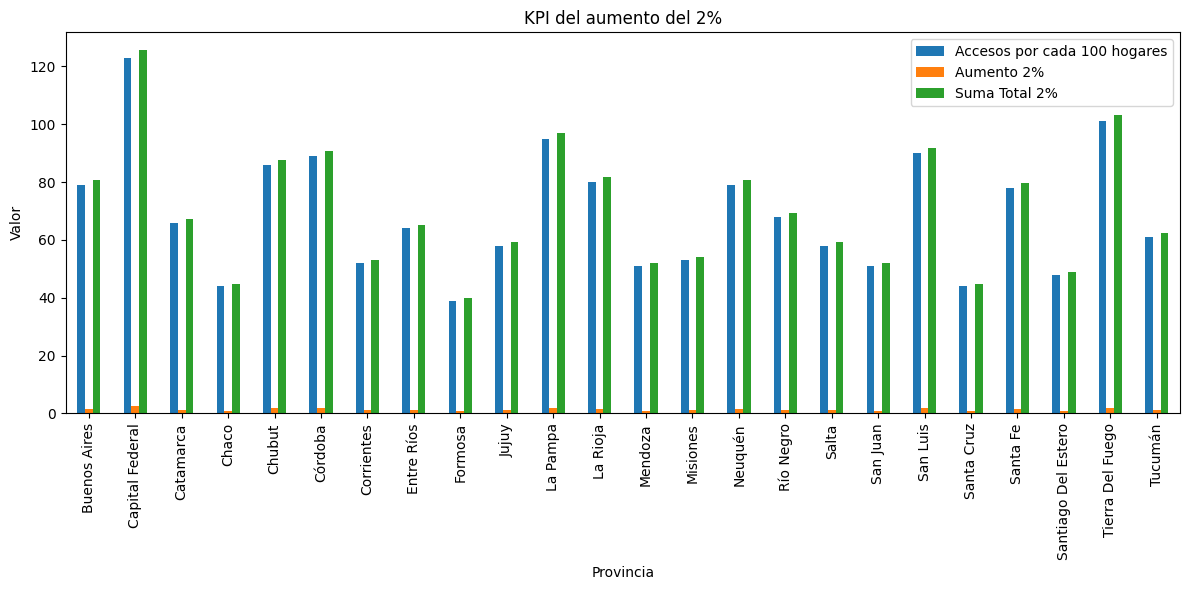

In [28]:
# Crear un gráfico de barras
fig, ax = plt.subplots(figsize=(12, 6))
nuevo_df.plot(kind='bar', x='Provincia', y=['Accesos por cada 100 hogares', 'Aumento 2%', 'Suma Total 2%'], ax=ax)

# Configurar el título y las etiquetas de los ejes
ax.set_title('KPI del aumento del 2%')
ax.set_xlabel('Provincia')
ax.set_ylabel('Valor')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

------------------------------------------------

## 2º KPI :  


- Aumentar un 50% el acceso al servicio de internet para el proximo trimestre, cada 100 hogares, por provincia. La idea es aumentar la mitad de lo que ya habia. 

La fórmula es la siguiente:
KPI = ((nuevamitad - accesoactual)/accesoactual) * 100

- "Nueva mitad" se refiere al número de hogares con acceso a Internet después del próximo trimestre.
- "Acceso actual" se refiere al número de hogares con acceso a Internet en el trimestre actual.

Se le suma al datframe anterior el registro del aumento del 50%.

In [64]:
nuevo_df['Aumento 50%'] = nuevo_df['Accesos por cada 100 hogares'] * 0.5

C:\Users\Santiago\AppData\Local\Temp\ipykernel_15392\3985062531.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nuevo_df['Aumento 50%'] = nuevo_df['Accesos por cada 100 hogares'] * 0.5


In [65]:
nuevo_df

,Año,Trimestre,Provincia,Accesos por cada 100 hogares,Aumento 2%,Suma Total 2%,Aumento 50%
0,2022,4,Buenos Aires,79,1.58,80.58,39.5
1,2022,4,Capital Federal,123,2.46,125.46,61.5
2,2022,4,Catamarca,66,1.32,67.32,33.0
3,2022,4,Chaco,44,0.88,44.88,22.0
4,2022,4,Chubut,86,1.72,87.72,43.0
5,2022,4,Córdoba,89,1.78,90.78,44.5
6,2022,4,Corrientes,52,1.04,53.04,26.0
7,2022,4,Entre Ríos,64,1.28,65.28,32.0
8,2022,4,Formosa,39,0.78,39.78,19.5
9,2022,4,Jujuy,58,1.16,59.16,29.0


Suma del totoal del Aumento del 50% que es de 828.5

In [66]:
# Calcular la suma de la columna 'Accesos por cada 100 hogares'
suma_accesos = nuevo_df['Aumento 50%'].sum()

# La variable 'suma_accesos' ahora contiene la suma de la columna 'Accesos por cada 100 hogares'
print("Suma de la columna 'Aumento 50%':", suma_accesos)

Suma de la columna 'Aumento 50%': 828.5


Al dataframe se le arrgera una columna nueva con la Suma Toal del 50% por provincia.

In [67]:
# Sumar las columnas 'Accesos por cada 100 hogares' y 'Aumento 2%' y guardar el resultado en una nueva columna
nuevo_df['Suma Total del 50%'] = nuevo_df['Accesos por cada 100 hogares'] + nuevo_df['Aumento 50%']

C:\Users\Santiago\AppData\Local\Temp\ipykernel_15392\1196622908.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nuevo_df['Suma Total del 50%'] = nuevo_df['Accesos por cada 100 hogares'] + nuevo_df['Aumento 50%']


In [68]:
nuevo_df

,Año,Trimestre,Provincia,Accesos por cada 100 hogares,Aumento 2%,Suma Total 2%,Aumento 50%,Suma Total del 50%
0,2022,4,Buenos Aires,79,1.58,80.58,39.5,118.5
1,2022,4,Capital Federal,123,2.46,125.46,61.5,184.5
2,2022,4,Catamarca,66,1.32,67.32,33.0,99.0
3,2022,4,Chaco,44,0.88,44.88,22.0,66.0
4,2022,4,Chubut,86,1.72,87.72,43.0,129.0
5,2022,4,Córdoba,89,1.78,90.78,44.5,133.5
6,2022,4,Corrientes,52,1.04,53.04,26.0,78.0
7,2022,4,Entre Ríos,64,1.28,65.28,32.0,96.0
8,2022,4,Formosa,39,0.78,39.78,19.5,58.5
9,2022,4,Jujuy,58,1.16,59.16,29.0,87.0


Se calcula la suma de los totales.

In [69]:
suma_accesos = nuevo_df['Accesos por cada 100 hogares'].sum()
suma_aumento50 = nuevo_df['Aumento 50%'].sum()
suma_total50 = nuevo_df['Suma Total del 50%'].sum()

Nueva linea con las sumas totales {'Accesos por cada 100 hogares': 1657,
 'Aumento 50%': 828.5,
 'Suma Total del 50%': 2485.5}

In [70]:
nueva_fila = { 'Accesos por cada 100 hogares': suma_accesos,'Aumento 50%': suma_aumento50, 'Suma Total del 50%': suma_total50}
nueva_fila

{'Accesos por cada 100 hogares': 1657,
 'Aumento 50%': 828.5,
 'Suma Total del 50%': 2485.5}

Se justifica si el KPI dio bien.

In [71]:
((suma_total50 - suma_accesos)/ suma_accesos) *100

50.0

- Según la proyección de un aumento del 50% para el próximo trimestre, se espera que el acceso a Internet aumente significativamente, alcanzando un total de 828.5%.

                                                                   GRAFICO

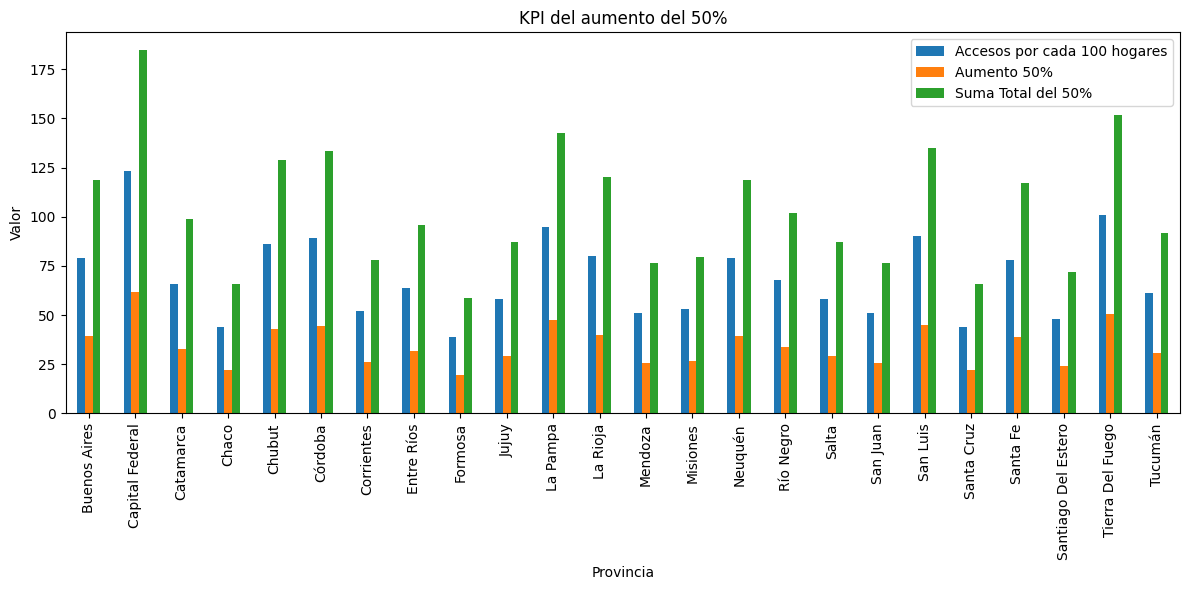

In [72]:
# Crear un gráfico de barras
fig, ax = plt.subplots(figsize=(12, 6))
nuevo_df.plot(kind='bar', x='Provincia', y=['Accesos por cada 100 hogares', 'Aumento 50%', 'Suma Total del 50%'], ax=ax)

# Configurar el título y las etiquetas de los ejes
ax.set_title('KPI del aumento del 50%')
ax.set_xlabel('Provincia')
ax.set_ylabel('Valor')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

--------------

## 3º KPI:


- Aumentar un 100% el acceso al servicio de internet para el proximo trimestre, cada 100 hogares, por provincia. 

La fórmula es la siguiente:
KPI = ((Aumento 100% - Acceso actual)/Acceso actual) * 100

- "Aumento 100%" se refiere al número de hogares con acceso a Internet después del próximo trimestre.
- "Acceso actual" se refiere al número de hogares con acceso a Internet en el trimestre actual.

Se agrega una columna nueva 'Aumento 100%'

In [38]:
# Luego, puedes crear la columna 'Aumento 2%' como se mencionó anteriormente
nuevo_df['Aumento 100%'] = nuevo_df['Accesos por cada 100 hogares'] * 1

C:\Users\Santiago\AppData\Local\Temp\ipykernel_15392\2560665228.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nuevo_df['Aumento 100%'] = nuevo_df['Accesos por cada 100 hogares'] * 1


Se abre para ver.

In [39]:
nuevo_df

,Año,Trimestre,Provincia,Accesos por cada 100 hogares,Aumento 2%,Suma Total 2%,Aumento 50%,Suma Total del 50%,Aumento 100%
0,2022,4,Buenos Aires,79,1.58,80.58,39.5,118.5,79
1,2022,4,Capital Federal,123,2.46,125.46,61.5,184.5,123
2,2022,4,Catamarca,66,1.32,67.32,33.0,99.0,66
3,2022,4,Chaco,44,0.88,44.88,22.0,66.0,44
4,2022,4,Chubut,86,1.72,87.72,43.0,129.0,86
5,2022,4,Córdoba,89,1.78,90.78,44.5,133.5,89
6,2022,4,Corrientes,52,1.04,53.04,26.0,78.0,52
7,2022,4,Entre Ríos,64,1.28,65.28,32.0,96.0,64
8,2022,4,Formosa,39,0.78,39.78,19.5,58.5,39
9,2022,4,Jujuy,58,1.16,59.16,29.0,87.0,58


Se calcula la suma del 'Aumento 100%'.

In [40]:
# Calcular la suma de la columna 'Accesos por cada 100 hogares'
suma_accesos = nuevo_df['Aumento 100%'].sum()

# La variable 'suma_accesos' ahora contiene la suma de la columna 'Accesos por cada 100 hogares'
print("Suma de la columna 'Aumento 100%':", suma_accesos)

Suma de la columna 'Aumento 100%': 1657


Se agrega una columna sobre lo de arriba.

In [41]:
# Sumar las columnas 'Accesos por cada 100 hogares' y 'Aumento 2%' y guardar el resultado en una nueva columna
nuevo_df['Suma Total del 100%'] = nuevo_df['Accesos por cada 100 hogares'] + nuevo_df['Aumento 100%']

C:\Users\Santiago\AppData\Local\Temp\ipykernel_15392\1170198360.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nuevo_df['Suma Total del 100%'] = nuevo_df['Accesos por cada 100 hogares'] + nuevo_df['Aumento 100%']


In [42]:
nuevo_df

,Año,Trimestre,Provincia,Accesos por cada 100 hogares,Aumento 2%,Suma Total 2%,Aumento 50%,Suma Total del 50%,Aumento 100%,Suma Total del 100%
0,2022,4,Buenos Aires,79,1.58,80.58,39.5,118.5,79,158
1,2022,4,Capital Federal,123,2.46,125.46,61.5,184.5,123,246
2,2022,4,Catamarca,66,1.32,67.32,33.0,99.0,66,132
3,2022,4,Chaco,44,0.88,44.88,22.0,66.0,44,88
4,2022,4,Chubut,86,1.72,87.72,43.0,129.0,86,172
5,2022,4,Córdoba,89,1.78,90.78,44.5,133.5,89,178
6,2022,4,Corrientes,52,1.04,53.04,26.0,78.0,52,104
7,2022,4,Entre Ríos,64,1.28,65.28,32.0,96.0,64,128
8,2022,4,Formosa,39,0.78,39.78,19.5,58.5,39,78
9,2022,4,Jujuy,58,1.16,59.16,29.0,87.0,58,116


Se calcula la suma de los totales.

In [43]:
suma_accesos = nuevo_df['Accesos por cada 100 hogares'].sum()
suma_aumento100 = nuevo_df['Aumento 100%'].sum()
suma_total100 = nuevo_df['Suma Total del 100%'].sum()

Se crea una flia con los resultados de arriba.


In [44]:
nueva_fila = { 'Accesos por cada 100 hogares': suma_accesos,'Aumento 100%': suma_aumento100, 'Suma Total del 100%': suma_total100}
nueva_fila

{'Accesos por cada 100 hogares': 1657,
 'Aumento 100%': 1657,
 'Suma Total del 100%': 3314}

Se justifica si el KPI dio bien.

In [45]:
((suma_total100 - suma_accesos)/ suma_accesos) *100

100.0

- Segun lo planteado que fue aumentar un 100% el servicio a internet con un numero de  1657%. 

                                                                                                      GRAFICO

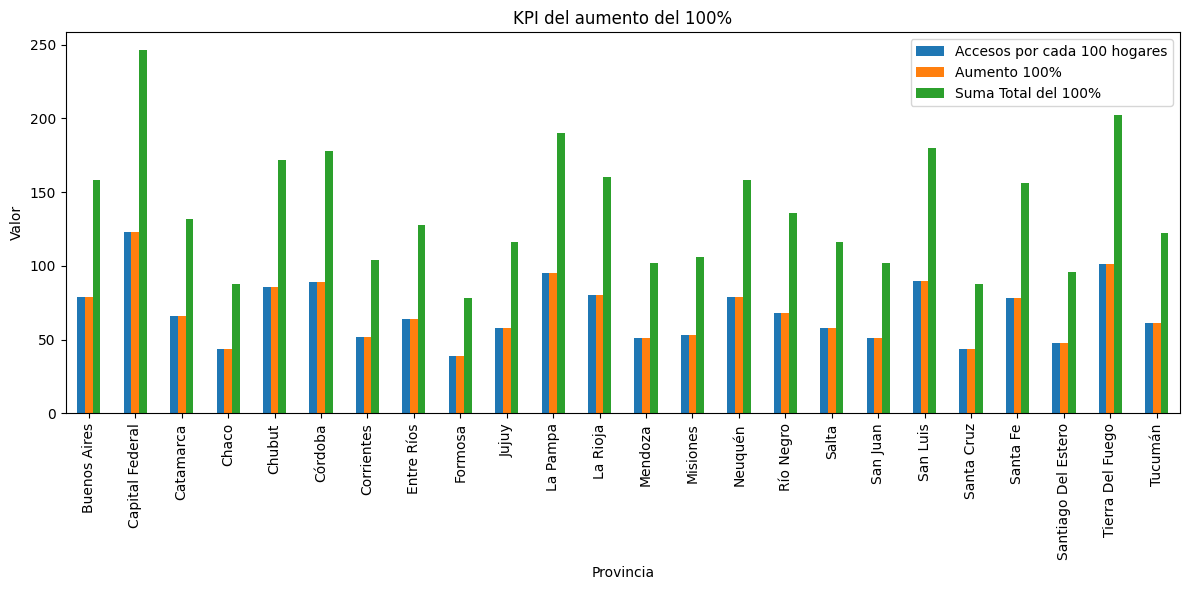

In [46]:
# Crear un gráfico de barras
fig, ax = plt.subplots(figsize=(12, 6))
nuevo_df.plot(kind='bar', x='Provincia', y=['Accesos por cada 100 hogares', 'Aumento 100%', 'Suma Total del 100%'], ax=ax)

# Configurar el título y las etiquetas de los ejes
ax.set_title('KPI del aumento del 100%')
ax.set_xlabel('Provincia')
ax.set_ylabel('Valor')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

--------------------------------

                                                             GRAFICO EN CONJUNTO

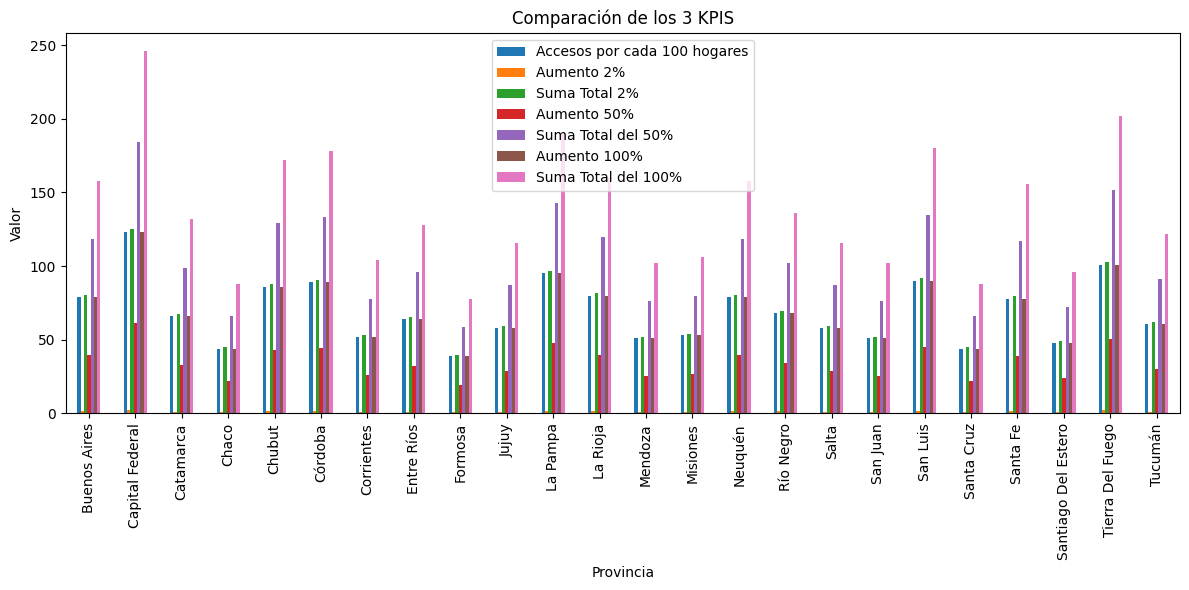

In [47]:
# Crear un gráfico de barras
fig, ax = plt.subplots(figsize=(12, 6))
nuevo_df.plot(kind='bar', x='Provincia', y=['Accesos por cada 100 hogares', 'Aumento 2%', 'Suma Total 2%', 'Aumento 50%', 'Suma Total del 50%','Aumento 100%', 'Suma Total del 100%'], ax=ax)

# Configurar el título y las etiquetas de los ejes
ax.set_title('Comparación de los 3 KPIS')
ax.set_xlabel('Provincia')
ax.set_ylabel('Valor')

# Mostrar el gráfico
plt.tight_layout()
plt.show()